In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Google Drive 마운트해서 데이터셋 가져옴

In [ ]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# ROOT_DIR, DATA_ROOT_DIR 설정

In [ ]:
import os

ROOT_DIR = '/content'

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'Dataset_BUSI_with_GT')  # 압축파일 root dir

# Classification 위한 DATA_ROOT_DIR 설정

In [ ]:
CLASSIFICATION_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'Classification')

CLASSIFICATION_TRAIN_DATA_ROOT_DIR = os.path.join(CLASSIFICATION_DATA_ROOT_DIR, 'train')

CLASSIFICATION_TEST_DATA_ROOT_DIR = os.path.join(CLASSIFICATION_DATA_ROOT_DIR, 'test')

# Google Drive 에서 dataset download

In [ ]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/My Drive/Colab Notebooks/dataset'
    
    shutil.copy(os.path.join(dataset_path, 'Dataset_BUSI_with_GT.zip'), '/content')

except Exception as err:
    print(str(err))

In [ ]:
import os
import shutil

# DATA_ROOT_DIR 삭제
if os.path.exists(DATA_ROOT_DIR):    
    
    shutil.rmtree(DATA_ROOT_DIR)    
    print(DATA_ROOT_DIR + ' is removed !!!')

# CLASSIFICATION_DATA_ROOT_DIR 삭제
if os.path.exists(CLASSIFICATION_DATA_ROOT_DIR):
    
    shutil.rmtree(CLASSIFICATION_DATA_ROOT_DIR)    
    print(CLASSIFICATION_DATA_ROOT_DIR + ' is removed !!!')

/content/Dataset_BUSI_with_GT is removed !!!
/content/Classification is removed !!!


In [ ]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'Dataset_BUSI_with_GT.zip'), 'r') as target_file:

    target_file.extractall(DATA_ROOT_DIR) 

In [ ]:
import shutil
import os
import glob

#========================================================
# 전체 파일 확인 (디렉토리와 일부 파일 혼재하고 있음)
# isfile(), isdir() 사용하기 위해서는 full_path를 사용해야 하므로
# os.listdir() 대신에 glob.glob() 사용함
#========================================================

total_file_list = glob.glob(os.path.join(DATA_ROOT_DIR, '*'))

print(total_file_list)    

#========================================================
# 정답 리스트 추출 (디렉토리 이름이 정답임)
#========================================================

label_name_list = [ file_name.split('/')[-1].strip()  for file_name in total_file_list  if os.path.isdir(file_name) == True ]

print(label_name_list)

['/content/Dataset_BUSI_with_GT/benign', '/content/Dataset_BUSI_with_GT/malignant', '/content/Dataset_BUSI_with_GT/normal']
['benign', 'malignant', 'normal']


#### Classification 데이터 생성

In [ ]:
import os

# CLASSIFICATION_DATA_ROOT_DIR 생성
if not os.path.exists(CLASSIFICATION_DATA_ROOT_DIR):    # CLASSIFICATION_DATA_ROOT_DIR 생성

    os.mkdir(CLASSIFICATION_DATA_ROOT_DIR)
    print(CLASSIFICATION_DATA_ROOT_DIR + ' is created !!')

/content/Classification is created !!


In [ ]:
#========================================================
# copytree 이용해서 정답이름/images 디렉토리를 
# train/정답이름 으로 복사함
#========================================================

for label_name in label_name_list:

    src_dir_path = os.path.join(DATA_ROOT_DIR, label_name)
    dst_dir_path = os.path.join(CLASSIFICATION_DATA_ROOT_DIR, 'train'+'/'+label_name)

    try:
        shutil.copytree(src_dir_path, dst_dir_path)
        print(label_name+' copytree is done !!')

    except Exception as err:
        print(str(err))

benign copytree is done !!
malignant copytree is done !!
normal copytree is done !!


In [ ]:
import os

#========================================================
# Classification 위한 train 정답 및 전체 데이터 개수 확인
# 현재는 image 와 mask 함께 존재하고 있음
#========================================================

train_label_name_list = os.listdir(CLASSIFICATION_TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(CLASSIFICATION_TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['benign', 'malignant', 'normal']
train label :  benign  =>  891
train label :  malignant  =>  421
train label :  normal  =>  266


In [ ]:
import os
import glob
import pandas as pd

image_file_list = []    # 이미지 파일 리스트
mask_file_list = []     # 마스크 파일 리스트

#===================================================================
# Classification 목적이므로 train 정답 디렉토리에 있는
# mask 파일은 제거하기 위해 Pandas.DataFrame 생성한 후에 
# str.contains 이용해서 이미지와 마스크 파일 목록을 각각 추출함
#===================================================================

train_label_name_list = os.listdir(CLASSIFICATION_TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)


for label_name in train_label_name_list:    # 각각의 정답(label)에 대해서

    temp_dic = {}    # 각 정답에 있는 파일목록을 정답과 함께 저장해두기 위한 임시 변수

    file_list = glob.glob(CLASSIFICATION_TRAIN_DATA_ROOT_DIR+'/'+label_name+'/*')

    temp_dic[label_name] = file_list    # temp_dic['label_name'] = [ file_name, ... ]

    # label_name 을 column 으로 가지는 temp DataFrame 생성
    temp_df = pd.DataFrame(temp_dic)

    #############################################################
    # 1개의 column 에 대해서 str.contains 이용해서 image, mask
    # 파일목록을 각각 추출해서 mask 파일은 remove 이용해 삭제함
    #############################################################
    image_file_df = temp_df[~temp_df[label_name].str.contains('_mask')].reset_index(drop=True)

    mask_file_df = temp_df[temp_df[label_name].str.contains('_mask')].reset_index(drop=True)

    print('current label = ', label_name, ' , image nums = ', len(image_file_df), ' , mask nums = ', len(mask_file_df))

    remove_nums = 0
    
    for row in range(len(mask_file_df)):

        try:
            os.remove(mask_file_df.loc[row,label_name])
            remove_nums += 1

        except Exception as err:
            print(str(err))

    print('current label = ', label_name, ' , remove mask nums = ', remove_nums)

['benign', 'malignant', 'normal']
current label =  benign  , image nums =  437  , mask nums =  454
current label =  benign  , remove mask nums =  454
current label =  malignant  , image nums =  210  , mask nums =  211
current label =  malignant  , remove mask nums =  211
current label =  normal  , image nums =  133  , mask nums =  133
current label =  normal  , remove mask nums =  133


# Classification 에서 Data Augmentation 하기 위한 전체 데이터 개수 계산

In [ ]:
import os

train_label_name_list = os.listdir(CLASSIFICATION_TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

total_image_data_nums = 0

for label_name in train_label_name_list:    # 각각의 정답(label)에 대해서

    image_data_nums = len(os.listdir(os.path.join(CLASSIFICATION_TRAIN_DATA_ROOT_DIR, label_name)))

    print('label = ', label_name, ' , data nums = ', image_data_nums)
    
    total_image_data_nums += image_data_nums

print('total image data nums = ', total_image_data_nums)

['benign', 'malignant', 'normal']
label =  benign  , data nums =  437
label =  malignant  , data nums =  210
label =  normal  , data nums =  133
total image data nums =  780


# Classification/test 디렉토리 생성
# Classification/test/하위 디렉토리 생성

In [ ]:
#==============================================================
# 현재 코드에서는 test 디렉토리를 만들 필요 없지만, 차후에 필요
# 할 수 있기 때문에 Classification test dir 생성해둠
#==============================================================
if not os.path.exists(CLASSIFICATION_TEST_DATA_ROOT_DIR):

    os.mkdir(CLASSIFICATION_TEST_DATA_ROOT_DIR)
    print(CLASSIFICATION_TEST_DATA_ROOT_DIR + ' is created !!')
    
else:
    print(CLASSIFICATION_TEST_DATA_ROOT_DIR + ' already exists')
#==============================================================


#==============================================================
# test dir 하위디렉토리에 정답 디렉토리 생성
#==============================================================

for label_name in label_name_list:

    if not os.path.exists(os.path.join(CLASSIFICATION_TEST_DATA_ROOT_DIR, label_name)):

        os.mkdir(os.path.join(CLASSIFICATION_TEST_DATA_ROOT_DIR, label_name))
        print(os.path.join(CLASSIFICATION_TEST_DATA_ROOT_DIR, label_name) + ' is created !!')

    else:
        print(os.path.join(CLASSIFICATION_TEST_DATA_ROOT_DIR, label_name) + ' already exists')

/content/Classification/test is created !!
/content/Classification/test/benign is created !!
/content/Classification/test/malignant is created !!
/content/Classification/test/normal is created !!


# ImageDataGenerator 이용해서 train data augmentation

In [ ]:
TOTAL_TRAIN_IMAGE_DATA_NUMS = total_image_data_nums

In [ ]:
original_gen = ImageDataGenerator(rescale=1./255)  

In [ ]:
original_generator = original_gen.flow_from_directory(CLASSIFICATION_TRAIN_DATA_ROOT_DIR,
                                   batch_size=TOTAL_TRAIN_IMAGE_DATA_NUMS, shuffle=False,
                                   target_size=(224, 224), class_mode='sparse')

print(original_generator.class_indices)
print(original_generator.num_classes)
print(original_generator.class_mode)

Found 780 images belonging to 3 classes.
{'benign': 0, 'malignant': 1, 'normal': 2}
3
sparse


In [ ]:
# 원본 이미지 데이터를 x_train, y_train 설정

x_train, y_train = original_generator.next()

print(x_train.shape, y_train.shape)

(780, 224, 224, 3) (780,)


#### Augmentation Data 생성

In [ ]:
AUGMENTATION_COUNT = 4    # 원본 데이터의 4배 증대

In [ ]:
augmentation_gen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=10, shear_range=0.1,
                                      horizontal_flip=True, zoom_range=0.1,
                                      width_shift_range=0.1, height_shift_range=0.1)

In [ ]:
augmentation_generator = augmentation_gen.flow_from_directory(CLASSIFICATION_TRAIN_DATA_ROOT_DIR,
                                   batch_size=TOTAL_TRAIN_IMAGE_DATA_NUMS, shuffle=False,
                                   target_size=(224, 224), class_mode='sparse')

print(augmentation_generator.class_indices)
print(augmentation_generator.num_classes)
print(augmentation_generator.class_mode)

Found 780 images belonging to 3 classes.
{'benign': 0, 'malignant': 1, 'normal': 2}
3
sparse


In [ ]:
import numpy as np
from datetime import datetime

print('====================================================')
print('[bofore] ', x_train.shape, y_train.shape)
print('====================================================')

start_time = datetime.now()

for i in range(AUGMENTATION_COUNT):    # 780개의 전체 데이터에 대해서 AUGMENTATION_COUNT 배 AUGMENTATION 실행

    x_augmented, y_augmented = augmentation_generator.next()

    print('augmented shape = ', x_augmented.shape, y_augmented.shape)

    x_train = np.concatenate( (x_train, x_augmented) )
    y_train = np.concatenate( (y_train, y_augmented) )

end_time = datetime.now()

print('\nElapsed time => ', end_time-start_time)
print('====================================================')
print('[after] ', x_train.shape, y_train.shape)
print('====================================================')

[bofore]  (780, 224, 224, 3) (780,)
augmented shape =  (780, 224, 224, 3) (780,)
augmented shape =  (780, 224, 224, 3) (780,)
augmented shape =  (780, 224, 224, 3) (780,)
augmented shape =  (780, 224, 224, 3) (780,)

Elapsed time =>  0:00:52.214845
[after]  (3900, 224, 224, 3) (3900,)


# train data random shuffle

In [ ]:
s = np.arange(x_train.shape[0])

np.random.shuffle(s)

x_train = x_train[s]

y_train = y_train[s]

# train 과 test split ratio 설정
#### train : test = 8 : 2

In [ ]:
SPLIT_RATIO = 0.2

In [ ]:
split_num = int(SPLIT_RATIO*(x_train.shape[0]))

print('split nums => ', split_num)

split nums =>  780


#### x_test, y_test 생성

In [ ]:
x_test = x_train[:split_num]

y_test = y_train[:split_num]

print(x_test.shape, y_test.shape)

(780, 224, 224, 3) (780,)


#### x_train, y_train 생성

In [ ]:
x_train = x_train[split_num:]

y_train = y_train[split_num:]

print(x_train.shape, y_train.shape)

(3120, 224, 224, 3) (3120,)


In [ ]:
print(y_train[:5])
print(y_test[:5])

[2. 2. 0. 1. 1.]
[2. 1. 2. 0. 2.]


# 16 개의 데이터와 정답 출력

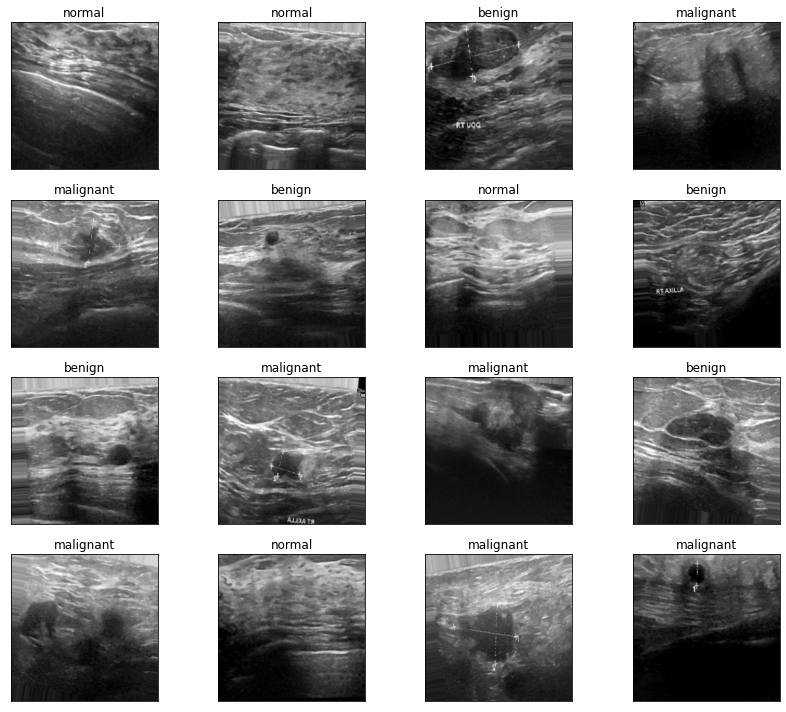

In [ ]:
import matplotlib.pyplot as plt

class_dict = {0:'benign', 1:'malignant', 2:'normal'}

plt.figure(figsize=(12,10))

for i in range(16):

    plt.subplot(4, 4, i+1)
    plt.title(str(class_dict[int(y_train[i])]))
    plt.xticks([]);  plt.yticks([])

    plt.imshow(x_train[i])

plt.tight_layout()
plt.show()

# IMAGE SHAPE 설정

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

# Fine Tuning 위한 pre-trained model 정의 및 모델 구축

In [ ]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
class_nums = original_generator.num_classes

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

# layer 많이 두면 충분한 학습이 되지 않음
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))  #
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))  #
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.5))  #
model.add(Dense(class_nums, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './Breast_Ultrasound_Classification_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # 가장 best 값만 저장
                             mode='auto'           # auto는 알아서 best를 찾음. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,          # 5회 Epoch동안 개선되지 않는다면 종료
                              verbose=1
                             )



start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 batch_size=32, epochs=30,
                 validation_data=(x_test, y_test))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/30
98/98 [==============================] - 34s 205ms/step - loss: 1.3884 - acc: 0.4375 - val_loss: 0.9375 - val_acc: 0.5103
Epoch 2/30
98/98 [==============================] - 19s 195ms/step - loss: 0.9823 - acc: 0.5657 - val_loss: 0.8259 - val_acc: 0.6179
Epoch 3/30
98/98 [==============================] - 19s 192ms/step - loss: 0.8102 - acc: 0.6449 - val_loss: 0.7143 - val_acc: 0.6987
Epoch 4/30
98/98 [==============================] - 19s 195ms/step - loss: 0.7030 - acc: 0.6862 - val_loss: 0.5986 - val_acc: 0.7628
Epoch 5/30
98/98 [==============================] - 19s 196ms/step - loss: 0.5747 - acc: 0.7587 - val_loss: 0.4860 - val_acc: 0.8090
Epoch 6/30
98/98 [==============================] - 19s 198ms/step - loss: 0.5226 - acc: 0.7913 - val_loss: 0.4169 - val_acc: 0.8321
Epoch 7/30
98/98 [==============================] - 20s 205ms/step - loss: 0.4372 - acc: 0.8260 - val_loss: 0.3488 - val_acc: 0.8705
Epoch 8/30
98/98 [==============================] - 20s 199ms/step - 

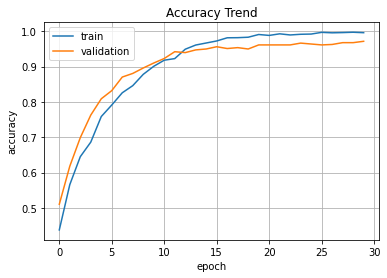

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

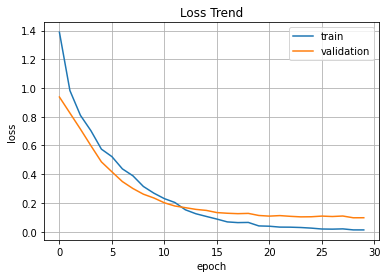

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

25/25 [==============================] - 1s 39ms/step - loss: 0.0971 - acc: 0.9718


[0.09708423167467117, 0.971794843673706]